In [1]:
import pandas as pd

In [7]:
df = pd.read_csv("/app/kather100k_augmentations.csv", header=[0, 1], index_col=0)
df

metric       label    cosine                                              \
augmentation label   macenko low brightness high brightness low contrast   
0              TUM  0.924883       0.967776        0.898465     0.955499   
1             NORM  0.964218       0.964090        0.896695     0.951192   
2             BACK  0.644412       0.955716        0.971977     0.958002   
3              LYM  0.915108       0.962510        0.841413     0.948940   
4              DEB  0.933440       0.981241        0.885429     0.974643   
...            ...       ...            ...             ...          ...   
99995         NORM  0.924853       0.960176        0.857106     0.944507   
99996          ADI  0.916139       0.974532        0.901889     0.969139   
99997          LYM  0.956751       0.973884        0.934880     0.963002   
99998          ADI  0.955614       0.973229        0.930234     0.961593   
99999          LYM  0.913393       0.959356        0.919287     0.942268   

metric                                                                   \
augmentation high contrast low saturation high saturation colour jitter   
0                 0.940875       0.990517        0.984408      0.973824   
1                 0.963605       0.981902        0.986923      0.964094   
2                 0.956681       0.976773        0.985902      0.992506   
3                 0.924985       0.992999        0.982985      0.949853   
4                 0.944916       0.991763        0.988178      0.952337   
...                    ...            ...             ...           ...   
99995             0.947369       0.982964        0.984853      0.869077   
99996             0.953568       0.991331        0.983568      0.908550   
99997             0.938798       0.993973        0.987099      0.910679   
99998             0.949827       0.993329        0.991137      0.887625   
99999             0.932048       0.987599        0.986500      0.884319   

metric                  ...  euclidean                                \
augmentation gamma 0.5  ... zoom 1.75x   zoom 2x    affine   erasing   
0             0.879960  ...   2.175305  2.538861  2.193238  0.628262   
1             0.893002  ...   2.592595  2.958088  2.647311  0.871028   
2             0.958230  ...   1.692835  2.237314  2.237348  0.862635   
3             0.905086  ...   3.709787  3.865326  2.968193  1.252046   
4             0.950080  ...   2.671926  2.782780  2.225593  1.093146   
...                ...  ...        ...       ...       ...       ...   
99995         0.861788  ...   2.477210  2.990129  2.629727  2.234274   
99996         0.946912  ...   1.989918  1.884673  1.755124  1.784428   
99997         0.920874  ...   2.755355  3.370190  3.107061  2.174462   
99998         0.930412  ...   2.007101  2.339262  2.246366  1.397450   
99999         0.843499  ...   2.837907  3.740761  3.049751  2.222436   

metric                                                                       \
augmentation warp perspective    jigsaw   sharpen gaussian blur median blur   
0                    2.332212  1.102014  2.068781      1.046411    1.634495   
1                    2.691445  1.792227  2.815113      1.030125    1.702550   
2                    2.881786  1.500873  2.183592      1.897867    1.117063   
3                    3.299748  1.236970  3.573544      1.194439    1.867687   
4                    2.282783  0.717223  2.491894      1.362126    2.688340   
...                       ...       ...       ...           ...         ...   
99995                2.828322  1.518898  2.213961      0.972741    1.536728   
99996                2.331371  1.091593  2.213310      1.200297    1.865306   
99997                3.295869  0.735593  2.917718      0.831035    1.959173   
99998                2.723921  0.893447  2.026784      1.313066    1.441018   
99999                3.254761  0.994067  2.446195      1.114323    1.732224   

metric                       
augmentation gaussian noise  
0         

In [9]:
dists = df["cosine"]
labels = df["label", "label"]
labels.name = "label"

<Axes: ylabel='augmentation'>

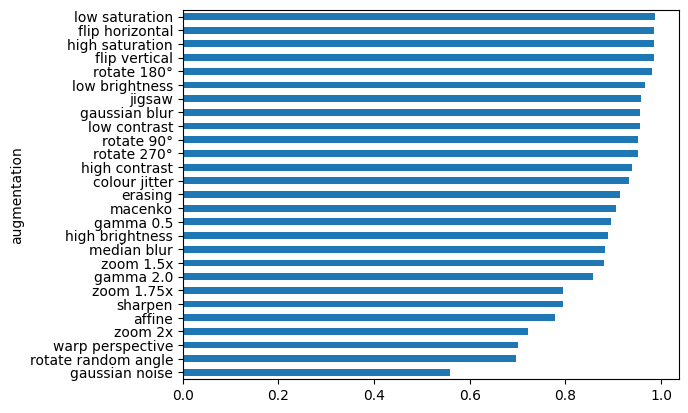

In [11]:
# dists[(labels == "BACK") & (dists["macenko"] != 1.)].mean().sort_values().plot.barh()
dists[(labels != "BACK")].mean().sort_values().plot.barh()

In [27]:
dists = df["euclidean"]
labels = df["label", "label"]
d1 = dists[(labels == 1) & (dists["macenko"] != 1.0)].mean().sort_values().index
dists = df["cosine"]
labels = df["label", "label"]
d2 = dists[(labels == 1) & (dists["macenko"] != 1.0)].mean().sort_values(ascending=False).index

pd.DataFrame({"euclidean": d1, "cosine": d2})

,euclidean,cosine
0,low saturation,low saturation
1,high saturation,high saturation
2,flip horizontal,flip horizontal
3,gamma 1.5,gamma 1.5
4,low brightness,low brightness
5,flip vertical,low contrast
6,low contrast,jigsaw
7,jigsaw,flip vertical
8,rotate 180°,rotate 180°
9,rotate 90°,high contrast


In [22]:
import h5py
from pathlib import Path

def load_features(path: Path)
    with h5py.File(path, "r") as f:
        classes = f.attrs["classes"]

        feats = f["feats"][:]
        labels = classes[f["labels"]]
        feats_augs = {
            k: f["feats_augs"][k][:]
            for k in f["feats_augs"].keys()
        }
    return feats, feats_augs, labels

(128, 768)